In [1]:
import pandas as pd

In [2]:
import os
folder = "wandb_data_response_pass"
runs = [os.path.join(run_folder, run) for run_folder in os.listdir(folder) for run in os.listdir(os.path.join(folder, run_folder))]
for run in runs:
    data = pd.read_csv(os.path.join(folder, run))
    response_length = data["response_length/mean"]
    rewards = data["critic/rewards/mean"]

In [3]:
import matplotlib.pyplot as plt

In [18]:
mix_path = "/lustrefs/users/shibo.hao/Reasoning360-May/analysis/wandb_data_response_pass/70459-zhoujun-mix-guru18k-models--Qwen--Qwen2.5-7B-think/run_data_2025-05-14T03:15:19Z.csv"

mix_data = pd.read_csv(mix_path)

In [36]:
data_source_domains = {
    "codegen": [
        ("codegen__leetcode2k", 216),
        ("codegen__taco", 1503),
        ("codegen__livecodebench", 75),
        ("codegen__primeintellect", 1278),
    ],
    "logic": [
        ("logic__zebra_puzzle_dataset", 637),
        ("logic__ordering_puzzle_dataset", 605),
        ("logic__graph_logical_dataset", 905),
        ("simulation__arcagi2", 93),
        ("simulation__arcagi1", 54),
        ("simulation__barc", 765),
    ],
    "table": [
        ("table__multihier", 803),
        ("table__hitab", 2269)
    ],
    "math": [
        ("math__merged_deduped_dapo_or1_dataset", 2087),
        ("math__deepscaler_preview", 985),
    ],
    "stem": [
        ("stem_web", 3072),
    ],
    "simulation": [
        ("simulation__codeio", 3072),
    ],
    
}

new_df_domains = {}

for domain in data_source_domains:
    domain_sources = data_source_domains[domain]
    score_cnt = 0
    for source, count in domain_sources:
        source_score = mix_data[f'critic/scores/{source}/mean']
        score_cnt += source_score * count / 3072
    new_df_domains[domain] = score_cnt

In [38]:
# stats the response length this way too
new_df_response_length_domains = {}
for domain in data_source_domains:
    domain_sources = data_source_domains[domain]
    score_cnt = 0
    for source, count in domain_sources:
        source_score = mix_data[f'response_length/{source}/mean']
        score_cnt += source_score * count / 3072
    new_df_response_length_domains[domain] = score_cnt

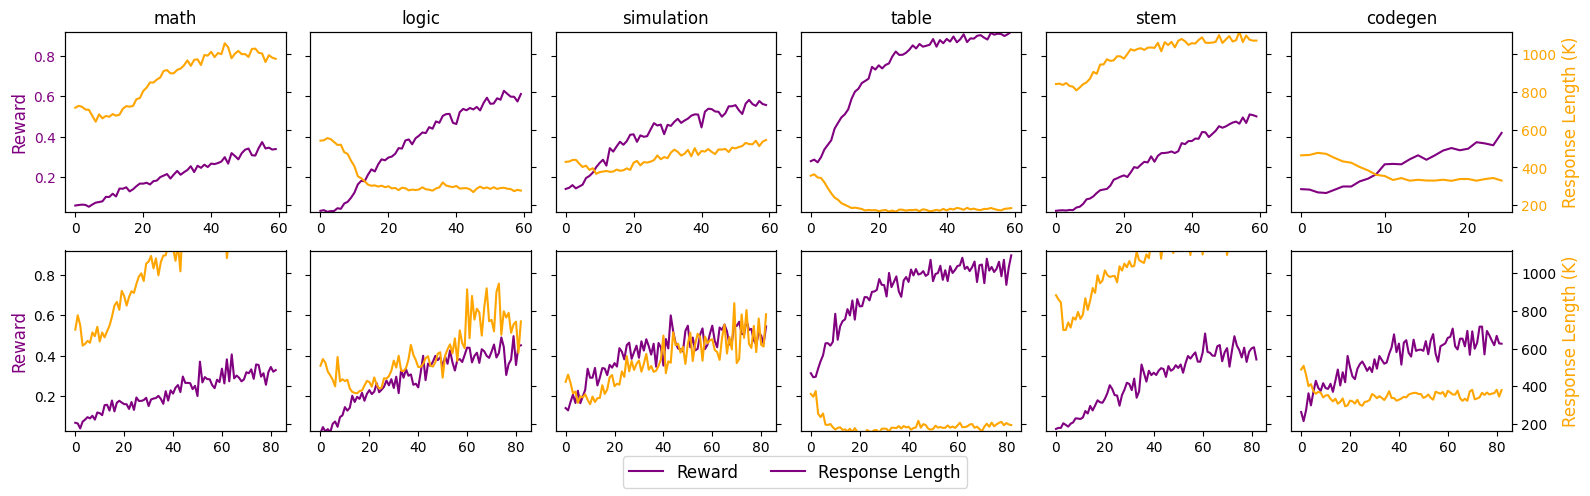

In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set the folder containing the CSVs organized by subfolders
folder = "wandb_data_response_pass"
runs = [os.path.join(folder, run_folder, run) for run_folder in os.listdir(folder)
        for run in os.listdir(os.path.join(folder, run_folder))]

# Prepare subplots in a single row
fig, axes = plt.subplots(2, 6, figsize=(16, 5))  # Wider aspect ratio
axes = axes.flatten()

# First pass: collect global min/max for unified y-axis limits
all_rewards, all_lengths = [], []
for run in runs:
    data = pd.read_csv(run)
    all_rewards.extend(data["critic/rewards/mean"].dropna())
    all_lengths.extend(data["response_length/mean"].dropna())

reward_min, reward_max = min(all_rewards), max(all_rewards)
length_min, length_max = min(all_lengths), max(all_lengths)

# Second pass: plot
runs_dict = {
    "math": "/lustrefs/users/shibo.hao/Reasoning360-May/analysis/wandb_data_response_pass/71131-zhoujun-math3k-guru18k-models--Qwen--Qwen2.5-7B-think/run_data_2025-05-14T10:34:02Z.csv",
    "codegen": "/lustrefs/users/shibo.hao/Reasoning360-May/analysis/wandb_data_response_pass/70449-zhoujun-codegen3k-guru18k-models--Qwen--Qwen2.5-7B-think/run_data_2025-05-14T03:07:32Z.csv",
    "logic": "/lustrefs/users/shibo.hao/Reasoning360-May/analysis/wandb_data_response_pass/71130-zhoujun-logic3k-guru18k-models--Qwen--Qwen2.5-7B-think/run_data_2025-05-14T10:33:53Z.csv",
    "simulation": "/lustrefs/users/shibo.hao/Reasoning360-May/analysis/wandb_data_response_pass/71162-zhoujun-simulation3k-guru18k-models--Qwen--Qwen2.5-7B-think/run_data_2025-05-14T11:08:31Z.csv",
    "table": "/lustrefs/users/shibo.hao/Reasoning360-May/analysis/wandb_data_response_pass/71136-zhoujun-table3k-guru18k-models--Qwen--Qwen2.5-7B-think/run_data_2025-05-14T10:41:24Z.csv",
    "stem": "/lustrefs/users/shibo.hao/Reasoning360-May/analysis/wandb_data_response_pass/71138-zhoujun-stem3k-guru18k-models--Qwen--Qwen2.5-7B-think/run_data_2025-05-14T10:45:56Z.csv",
}

orders = ["math", "logic", "simulation", "table", "stem", "codegen"]

# first row: runs_dict
for idx, run_title in enumerate(orders):
    
    run_path = runs_dict[run_title]
    data = pd.read_csv(run_path)
    rewards = data["critic/rewards/mean"]
    response_length = data["response_length/mean"]

    ax1 = axes[idx]
    ax2 = ax1.twinx()

    ax1.plot(rewards, color='purple')
    ax2.plot(response_length, color='orange')

    ax1.set_ylim(reward_min, reward_max)
    ax2.set_ylim(length_min, length_max)

    # Only show y-axis labels on the first and last subplots
    if idx != 0:
        ax1.set_yticklabels([])
        ax1.set_ylabel("")
    else:
        ax1.set_ylabel("Reward", color='purple', fontsize=12)

    if idx != 5:
        ax2.set_yticklabels([])
        ax2.set_ylabel("")
    else:
        ax2.set_ylabel("Response Length (K)", color='orange', fontsize=12)

    ax1.tick_params(axis='y', labelcolor='purple')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax1.set_title(run_title, fontsize=12)

# second row: put the content of new_df_domains into the subplots
for idx, domain in enumerate(orders):
    ax1 = axes[idx + 6]
    ax2 = ax1.twinx()
    ax1.plot(new_df_domains[domain], color='purple')
    ax2.plot(new_df_response_length_domains[domain], color='orange')
    ax1.set_ylim(reward_min, reward_max)
    ax2.set_ylim(length_min, length_max)

    if idx != 0:
        ax1.set_yticklabels([])
        ax1.set_ylabel("")
    else:
        ax1.set_ylabel("Reward", color='purple', fontsize=12)

    if idx != 5:
        ax2.set_yticklabels([])
        ax2.set_ylabel("")
    else:
        ax2.set_ylabel("Response Length (K)", color='orange', fontsize=12)



# Add shared legend
fig.legend(["Reward", "Response Length"], loc='lower center', ncol=2, fontsize=12)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

In [33]:
new_df_domains["logic"]

0     0.016242
1     0.045563
2     0.023957
3     0.035544
4     0.019793
        ...   
78    0.380016
79    0.495932
80    0.353022
81    0.445703
82    0.450729
Name: critic/scores/logic__zebra_puzzle_dataset/mean, Length: 83, dtype: float64

In [23]:
# directory = "/lustrefs/users/shibo.hao/leo/Reasoning360/data/train_guru18k"
# # list all files in the directory and open the parquet files
# # the count the 
# for file in os.listdir(directory):
#     if file.endswith(".parquet"):
#         data = pd.read_parquet(os.path.join(directory, file))
#         # stats
#         print(data["data_source"].value_counts())